In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from keras import layers
from keras.callbacks import EarlyStopping
import setuptools.dist
import keras

# Value regression

In [103]:
df = sns.load_dataset('mpg').drop("name", axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


<Axes: xlabel='origin'>

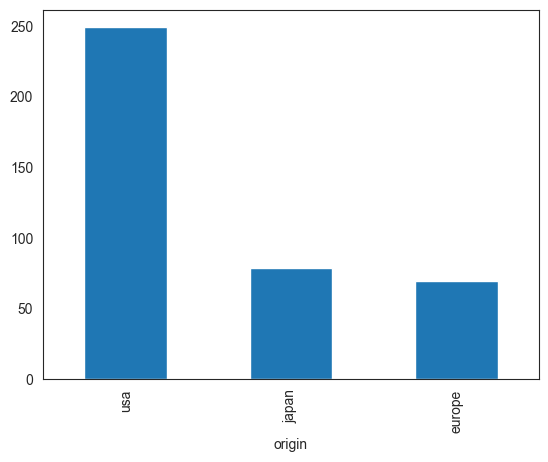

In [104]:
df['origin'].value_counts().plot(kind='bar')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [106]:
df.query('horsepower.isna()')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


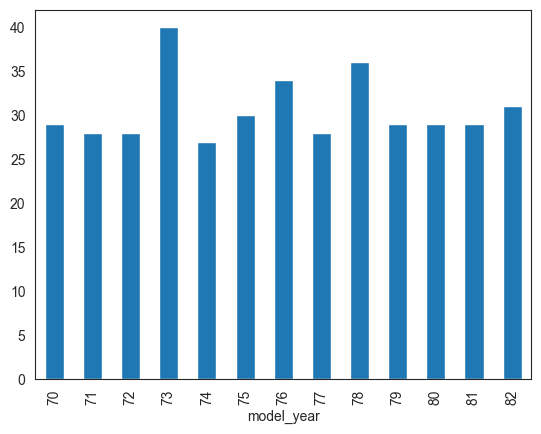

In [107]:
df['model_year'].value_counts().sort_index().plot(kind='bar')
df = df.dropna()

In [108]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74, 77), (78, 82)])

In [109]:
df['model_year'] = pd.cut(df['model_year'], bins)

In [110]:
df = pd.get_dummies(df, columns=['model_year', 'origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(69, 73]","model_year_(74, 77]","model_year_(78, 82]",origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,True,False,False,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,True,False,False,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,True,False,False,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,True,False,False,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,True,False,False,False,False,True


In [111]:
X, y = df.drop('mpg', axis=1).values, df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [112]:
scaled_X_train.max()

np.float64(3.3316518212133053)

In [113]:
y_train_class = pd.cut(y_train, bins=3, labels=[0, 1, 2])

model_lr = LogisticRegression()
model_lr.fit(scaled_X_train, y_train_class)

intercept, coef = model_lr.intercept_, model_lr.coef_
coef

array([[ 6.05187045e-01,  1.56718576e-01,  6.64594665e-01,
         2.40167164e+00,  6.49338083e-02,  5.78381732e-01,
         8.04444898e-02, -1.23905137e+00, -7.39584434e-02,
        -1.03936771e-01,  1.43392842e-01],
       [-6.09759225e-01,  5.16001481e-01,  4.35956856e-01,
        -5.77347447e-01,  2.63437917e-02, -1.12816705e-01,
         4.93554203e-01,  1.00685062e-01,  2.21501293e-03,
         2.38494708e-02, -2.15476211e-02],
       [ 4.57217976e-03, -6.72720057e-01, -1.10055152e+00,
        -1.82432420e+00, -9.12776000e-02, -4.65565027e-01,
        -5.73998693e-01,  1.13836631e+00,  7.17434305e-02,
         8.00873007e-02, -1.21845221e-01]])

In [114]:
inputs = keras.Input(shape=(X_train.shape[1],), name='input_layer')
outputs = layers.Dense(1, name='output_layer')(inputs)
model_shallow = keras.Model(inputs=inputs, outputs=outputs)

model_shallow.compile(optimizer=SGD(learning_rate=0.01), loss='mse', metrics=['mae'])

model_shallow.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

<Axes: xlabel='Epochs', ylabel='Loss/MAE'>

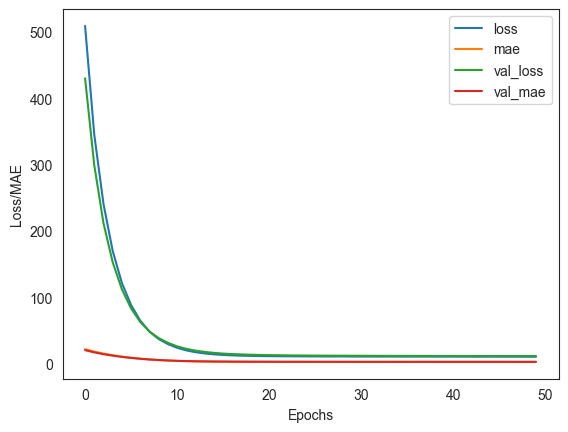

In [115]:
model_shallow.fit(scaled_X_train, y_train, epochs=50, verbose=0,
                  validation_data=(scaled_X_test, y_test)
                  )

pd.DataFrame(model_shallow.history.history).plot(xlabel="Epochs", ylabel="Loss/MAE")

In [116]:
weights, bias = model_shallow.layers[1].get_weights()
weights, coef

(array([[-0.95715016],
        [-0.11742505],
        [-1.3593564 ],
        [-2.898519  ],
        [-0.38824803],
        [-0.9961657 ],
        [-0.37073386],
        [ 2.1117477 ],
        [ 0.39561084],
        [ 0.6266418 ],
        [-0.2869209 ]], dtype=float32),
 array([[ 6.05187045e-01,  1.56718576e-01,  6.64594665e-01,
          2.40167164e+00,  6.49338083e-02,  5.78381732e-01,
          8.04444898e-02, -1.23905137e+00, -7.39584434e-02,
         -1.03936771e-01,  1.43392842e-01],
        [-6.09759225e-01,  5.16001481e-01,  4.35956856e-01,
         -5.77347447e-01,  2.63437917e-02, -1.12816705e-01,
          4.93554203e-01,  1.00685062e-01,  2.21501293e-03,
          2.38494708e-02, -2.15476211e-02],
        [ 4.57217976e-03, -6.72720057e-01, -1.10055152e+00,
         -1.82432420e+00, -9.12776000e-02, -4.65565027e-01,
         -5.73998693e-01,  1.13836631e+00,  7.17434305e-02,
          8.00873007e-02, -1.21845221e-01]]))

In [117]:
bias, intercept

(array([23.17442], dtype=float32),
 array([ 2.2378892 ,  1.66840854, -3.90629774]))

In [118]:
def evaluate_regression(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return mae, mse, np.sqrt(mse)

y_pred_NN = model_shallow.predict(scaled_X_test)
y_pred_lr = model_lr.predict(scaled_X_test)
scores = {model: evaluate_regression(y_test, y_pred) for model, y_pred in zip(['NN', 'LR'], [y_pred_NN, y_pred_lr])}

df_scores = pd.DataFrame(scores, index=['MAE', 'MSE', 'RMSE']).T

df_scores["RMSE_prop"] = df_scores["RMSE"] / y_test.mean()
df_scores

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


,MAE,MSE,RMSE,RMSE_prop
NN,2.496509,11.207930,3.347825,0.138977
LR,23.402542,601.162458,24.518615,1.017835


# Classification

In [119]:
sns.set_style('white')
raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

In [120]:
np.isnan(X).any()

np.False_

In [121]:
X.shape, y.shape

((569, 30), (569,))

In [122]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
scaled_X_train_val = scaler.fit_transform(X_train_val)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaler.transform(X_train)

In [127]:
model = keras.Sequential([layers.InputLayer((X.shape[1],), name="input"),
                          layers.Dense(30, name="Layer_1", activation='relu'), 
                          layers.Dense(30, name="Layer_2", activation='relu'),
                          layers.Dense(1, name="output", activation='sigmoid')], 
                        name = "Classifier")

model.compile(loss="binary_crossentropy", optimizer="adam")
model.summary()

Model: "Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
model.fit(scaled_X_train_val, y_train_val, epochs=1000, verbose=0, validation_data=(scaled_X_val, y_val))

<Axes: xlabel='Epochs', ylabel='Loss'>

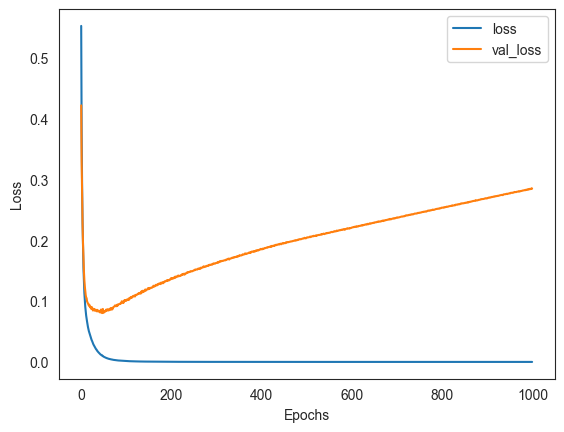

In [129]:
pd.DataFrame(model.history.history).plot(xlabel="Epochs", ylabel="Loss")

In [132]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15)  
model = keras.Sequential([layers.InputLayer((X.shape[1],), name="input"),
                          layers.Dense(30, name="Layer_1", activation='relu'), 
                          layers.Dense(30, name="Layer_2", activation='relu'),
                          layers.Dense(1, name="output", activation='sigmoid')], 
                        name = "Classifier")

model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(scaled_X_train_val, y_train_val, epochs=1000, verbose=1, validation_data=(scaled_X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8063 - val_loss: 0.6309
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5463 - val_loss: 0.4497
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4024 - val_loss: 0.3206
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2796 - val_loss: 0.2306
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2016 - val_loss: 0.1757
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1566 - val_loss: 0.1436
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073 - val_loss: 0.1245
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1047 - val_loss: 0.1106
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0918 - val_loss: 0.0989
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0893 - val_loss: 0.0908
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0672 - val_loss: 0.0861
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

<Axes: xlabel='Epochs', ylabel='Loss'>

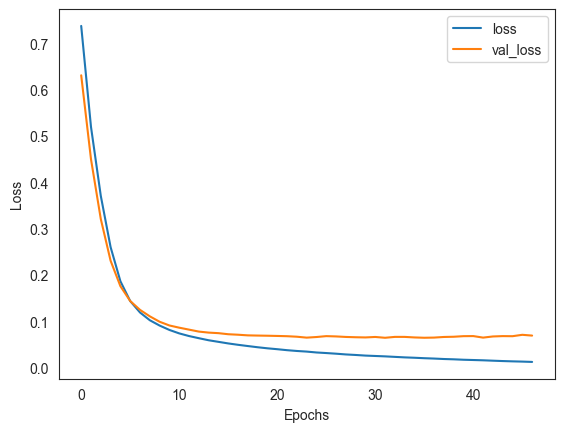

In [133]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(xlabel="Epochs", ylabel="Loss")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
[[8.7352335e-01]
 [1.8132132e-05]
 [1.9405998e-03]
 [9.9205709e-01]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        54

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



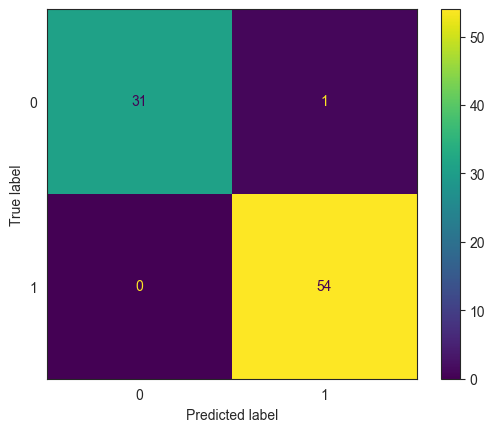

In [140]:
model = keras.Sequential([layers.InputLayer((X.shape[1],), name="input"),
                          layers.Dense(30, name="Layer_1", activation='relu'), 
                          layers.Dense(30, name="Layer_2", activation='relu'),
                          layers.Dense(1, name="output", activation='sigmoid')], 
                        name = "Classifier")
model.compile(loss="binary_crossentropy", optimizer="adam")
# scaled_X_train.shape, y_train.shape
model.fit(scaled_X_train, y_train, epochs=len(df_loss), verbose=0, validation_data=(scaled_X_test, y_test), callbacks=[early_stopping])
final_loss = pd.DataFrame(model.history.history)
y_pred = model.predict(scaled_X_test)
print(y_pred[:4])

y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))